In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,4)
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df['intAge'] = round(df['Age']).astype('int32')

In [4]:
df.drop('Age', axis=1, inplace=True)

In [5]:
df.describe()

,id,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,intAge
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,23.850371
std,5992.46278,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,5.700779
min,0.00000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,14.000000
25%,5189.25000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,20.000000
50%,10378.50000,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,23.000000
75%,15567.75000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,26.000000
max,20757.00000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,61.000000


c:\Users\05442188689\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='intAge', ylabel='Count'>

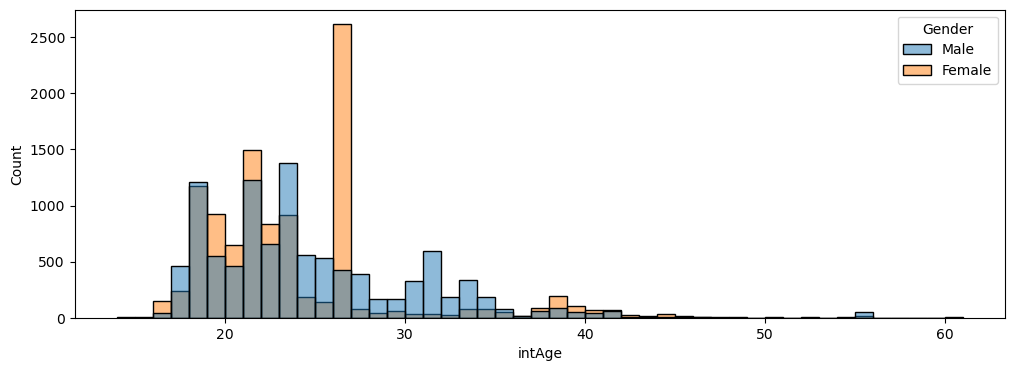

In [6]:
sns.histplot(data=df, x='intAge', bins=61-14, hue='Gender' )

In [7]:
df['IMC'] = df['Weight'] / (df['Height'] * 2)
df.drop(['Height', 'Weight'], axis=1, inplace=True)

c:\Users\05442188689\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='IMC', ylabel='Count'>

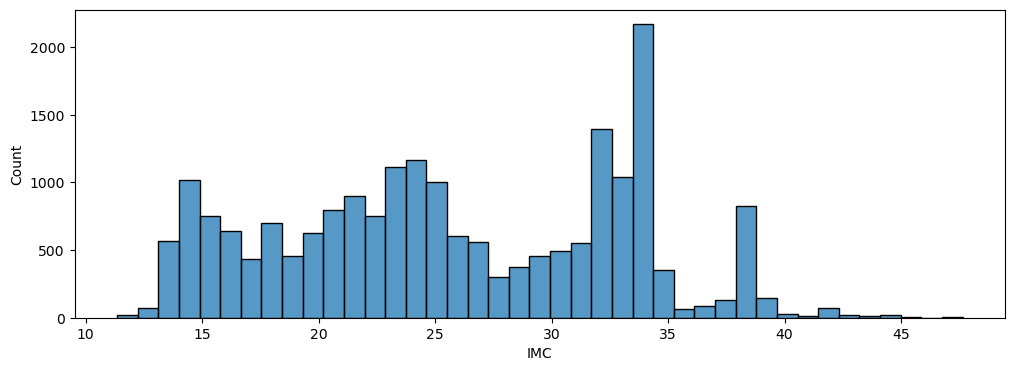

In [8]:
sns.histplot(df['IMC'])

In [9]:
label_encoder = LabelEncoder()
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

In [10]:
df

,id,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,intAge,IMC,NObeyesdad_encoded
0,0,Male,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,24,24.020602,6
1,1,Female,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,18,18.269231,1
2,2,Female,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,18,14.655836,0
3,3,Female,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,21,38.368080,4
4,4,Male,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,32,24.500768,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,25,32.317847,3
20754,20754,Male,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,18,14.619883,0
20755,20755,Male,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,20,29.012691,3
20756,20756,Male,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,34,24.564739,6


<Axes: xlabel='NObeyesdad', ylabel='IMC'>

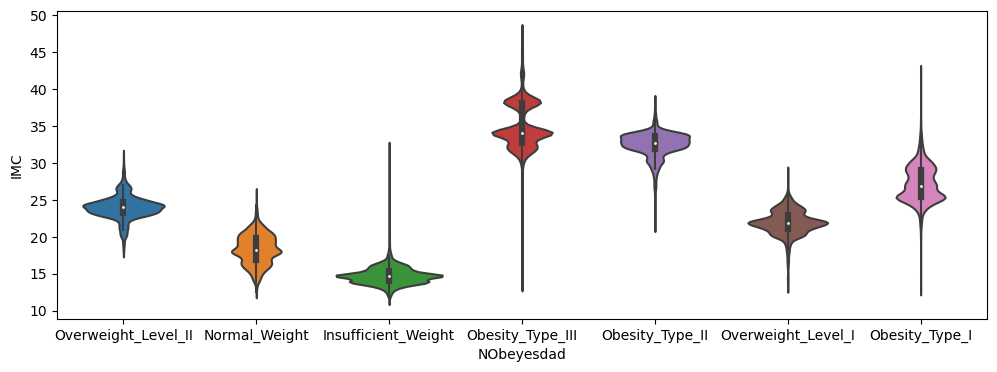

In [11]:
sns.violinplot(data=df, x='NObeyesdad', y='IMC')

<Axes: xlabel='NObeyesdad', ylabel='intAge'>

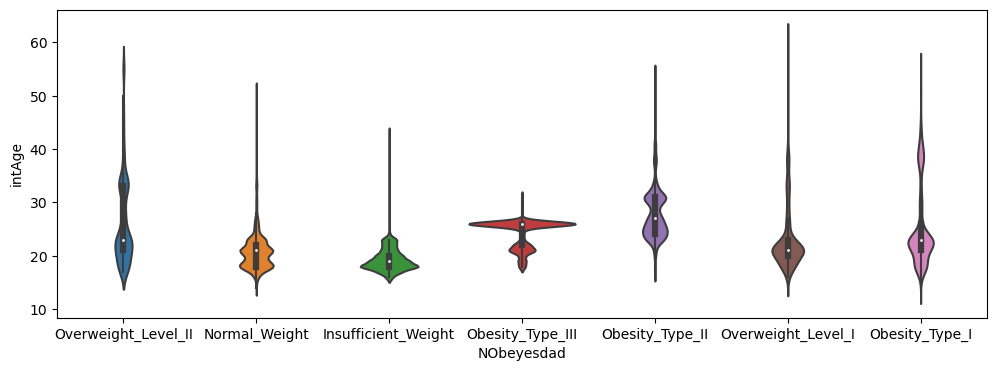

In [12]:
sns.violinplot(data=df, x='NObeyesdad', y='intAge')

<Axes: xlabel='NObeyesdad', ylabel='FCVC'>

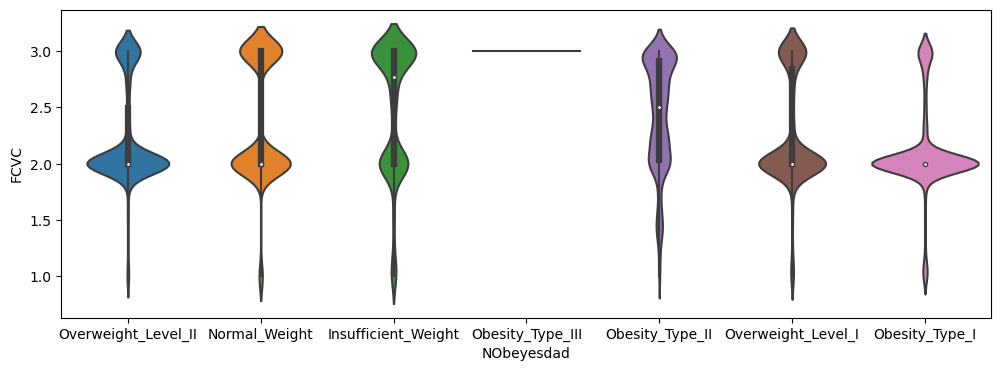

In [13]:
sns.violinplot(data=df, x='NObeyesdad', y='FCVC')

In [14]:
fig = px.histogram(df, x='IMC', marginal='box', color='SMOKE')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.funnel(df, x='NObeyesdad', y='IMC', color='SMOKE')
fig.show()